<a href="https://colab.research.google.com/github/monjjjjj/Multi-Label_Fashion-MNIST/blob/main/FashionMNIST_multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense

#from keras.utils import plot_model
from keras import utils as np_utils

from keras.callbacks import EarlyStopping

from google.colab import drive

from tensorflow.python import keras
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
from tensorflow import keras
from google.colab import drive
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras import initializers, optimizers
from keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50, ResNet152
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [ ]:
# google drive mounted
drive.mount('/content/drive')
# data path
training_label_dir = "/content/drive/MyDrive/FashionMNIST/training/"
testing_label_dir = "/content/drive/MyDrive/FashionMNIST/testing/"

Mounted at /content/drive


In [ ]:
raw_data = pd.read_csv(training_label_dir + "training_labels.csv")

#print(raw_data)

print(" >>> ", len(raw_data))

raw_pic = []
raw_lbl = []

for i in range(0, len(raw_data)):
    item = raw_data.iloc[i]
    
    img_file = training_label_dir + item['fname']
    print(img_file)
    img = cv2.imread(img_file)

    y = 0
    h = 160
    x = int ((646 - 640) / 2)
    w = 640 
    
    crop_img = img[y:y+h, x:x+w]
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    raw_pic.append(crop_img)
    
    lbl = item['label']
    print(lbl)
    lbl_in_np = np.fromstring(lbl[1:-1], dtype=int, sep=',')
    print(lbl_in_np)
    
    raw_lbl.append(lbl_in_np)



Streaming output truncated to the last 5000 lines.
[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[0 1 0 0 0 0 0 1 0 0]
/content/drive/MyDrive/FashionMNIST/training/8334.png
[0, 0, 0, 1, 0, 0, 0, 1, 1, 1]
[0 0 0 1 0 0 0 1 1 1]
/content/drive/MyDrive/FashionMNIST/training/8335.png
[0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
[0 1 0 0 0 1 1 1 0 0]
/content/drive/MyDrive/FashionMNIST/training/8336.png
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
[0 1 0 0 1 0 0 0 0 1]
/content/drive/MyDrive/FashionMNIST/training/8337.png
[1, 0, 0, 1, 0, 1, 1, 0, 0, 0]
[1 0 0 1 0 1 1 0 0 0]
/content/drive/MyDrive/FashionMNIST/training/8338.png
[0, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0 1 1 0 0 0 0 0 1 1]
/content/drive/MyDrive/FashionMNIST/training/8339.png
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[0 1 0 0 0 1 0 0 0 0]
/content/drive/MyDrive/FashionMNIST/training/8340.png
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
[0 0 0 0 1 0 1 0 1 0]
/content/drive/MyDrive/FashionMNIST/training/8341.png
[1, 1, 0, 0, 0, 0, 0, 1, 1, 0]
[1 1 0 0 0 0 0 1 1 0]
/content/drive/MyDrive/FashionMNIST/trai

In [ ]:
print(len(raw_pic))
print(len(raw_lbl))

10000
10000


In [ ]:
#process image
train_img = np.array(raw_pic)
print(" >>> train_img.shape = ", train_img.shape)
train_img_size_h = train_img.shape[1]
train_img_size_w = train_img.shape[2]
print(" >>> h = ", train_img_size_h)
print(" >>> w = ", train_img_size_w)

train_img = train_img.astype('float32') 
train_img /= 255.0

#preprocess label
train_lbl = np.array(raw_lbl)
print(" >>> train_ans.shape = ", train_lbl.shape)


 >>> train_img.shape =  (10000, 83, 331, 3)
 >>> h =  83
 >>> w =  331
 >>> train_ans.shape =  (10000, 10)


In [ ]:
#build model
input_shape_img = (train_img.shape[1], train_img.shape[2], 3)
batch_size = 32
num_epochs = 100
num_classes = 10
conv_size = 32

print(" >>> input_shape_img = ", input_shape_img)

def build_model():
  model = Sequential()

  model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same', input_shape=input_shape_img)) 
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same')) 
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same')) 
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(GlobalAveragePooling2D())

  model.add(Dense(num_classes, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
              
  print(model.summary())
  keras.utils.plot_model(model, show_shapes=True, dpi=64, to_file='model2.png')

  return model

 >>> input_shape_img =  (83, 331, 3)


In [ ]:
model = build_model()

#early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
                                            
history = model.fit(train_img, train_lbl,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.1)
                    #callbacks=[early_stop]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 83, 331, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 165, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 41, 165, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 82, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 82, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 41, 32)       0

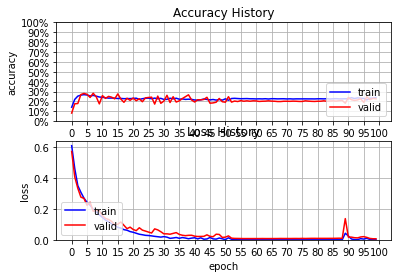

In [ ]:
################################################################################
# Check the history
################################################################################
plt.figure(facecolor='white')

# accuracy ---------------------------------------------------------------------
ax1 = plt.subplot(2,1,1)

plt.plot([x * 100 for x in history.history['accuracy']], label="acc", color="blue")
plt.plot([x * 100 for x in history.history['val_accuracy']], label="val_acc", color="red")

plt.title('Accuracy History')
plt.ylabel('accuracy')
# plt.xlabel('epoch')

plt.legend(['train', 'valid'], loc='lower right')

plt.ylim(0, 1)
plt.xticks(np.arange(0, num_epochs + 1, 5))
plt.yticks(np.arange(0, 100.1, 10))
ax1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.grid()

# loss -------------------------------------------------------------------------
plt.subplot(2,1,2)

plt.plot(history.history['loss'], label="loss", color="blue")
plt.plot(history.history['val_loss'], label="val_loss", color="red")

plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'valid'], loc='lower left')

plt.ylim(0)
plt.xticks(np.arange(0, num_epochs + 1, 5))
plt.grid()
plt.show()

In [ ]:
################################################################################
# Check the test dataset
################################################################################
t_data = pd.read_csv(testing_label_dir + "testing_labels.csv")

#print(raw_data)

print(" >>> ", len(raw_data))

t_pic = []
t_lbl = []
t_int = []
t_str = []

for i in range(0, len(t_data)):
    item = t_data.iloc[i]
    
    img_file = testing_label_dir + item['fname']
    print(img_file)
    img = cv2.imread(img_file)
    
    y = 0
    h = 160
    x = int((646 - 640) / 2)
    w = 640 
    
    crop_img = img[y:y+h, x:x+w]
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    t_pic.append(crop_img)
    
    lbl = item['label']
    print(lbl)
    lbl_in_np = np.fromstring(lbl[1:-1], dtype=int, sep=',')
    print(lbl_in_np)
    
    t_lbl.append(lbl_in_np)
    
    t_int.append(item['real_int'])
    t_str.append(item['real_str'])
    
#--- process image -------------------------------------------------------------
test_img = np.array(t_pic)
print(" >>> test_img.shape = ", test_img.shape)

test_img = test_img.astype('float32') 
test_img /= 255.0

#--- preprocess label ----------------------------------------------------------
test_lbl = np.array(t_lbl)
print(" >>> test_lbl.shape = ", test_lbl.shape)

#--- evaluate ------------------------------------------------------------------
acc = model.evaluate(test_img, test_lbl, verbose=1)[1]
print(" >>> acc = ", acc)

#--- create the new model ------------------------------------------------------
from keras.models import Model
from keras import backend as K
import scipy

gap_weights = model.layers[-1].get_weights()[0]
print(" >>> size(gap_weights) = ", gap_weights.size)

cam_model = Model(inputs=model.input, 
                    outputs=(model.layers[-3].output, model.layers[-1].output)) 
print(" >>> K.int_shape(model.layers[-3].output) = ", K.int_shape(model.layers[-3].output))
print(" >>> K.int_shape(model.layers[-1].output) = ", K.int_shape(model.layers[-1].output))

#--- make the prediction
features, results = cam_model.predict(test_img)

fashion_name = ['T-shirt/top',
                'Trouser',
                'Pullover',
                'Dress',
                'Coat',
                'Sandal',
                'Shirt',
                'Sneaker',
                'Bag',
                'Ankle boot']

#--- check the prediction for 10 test images
for idx in range(30):
    plt.figure(facecolor='white')
    
    ax = plt.subplot(1, 2, 1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.imshow(t_pic[idx])
    
    plt.xlabel("Real Labels: " + t_int[idx])
    plt.title(t_str[idx])
    
    plt.subplot(1, 2, 2)
    plt.bar(range(10), results[idx])
    plt.xticks(np.arange(0, 9.1, 1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Predicted Labels")
    plt.grid()
    
    plt.show()        
    
    print(" >>> ", results[idx])
    
    print(" >>> features[idx].shape = ", features[idx].shape)
    
    features_for_one_img = features[idx, :, :, :]
    print(" >>> features_for_one_img.shape = ", features_for_one_img.shape)
    print(" >>> features_for_one_img.shape[0] = ", features_for_one_img.shape[0])
    print(" >>> features_for_one_img.shape[1] = ", features_for_one_img.shape[1])

    height_roomout = train_img_size_h / features_for_one_img.shape[0]
    width_roomout = train_img_size_w / features_for_one_img.shape[1]
    
    print(" >>> height_roomout = ", height_roomout, " width_roomout = ", width_roomout)
    
    cam_features = scipy.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    
    print(" >>> after resize = ", cam_features.shape)
    
    for n, v in enumerate(results[idx]):
        print(" (n, v) = ", n , v)
        
    x = np.argsort(results[idx])
    print(" (x) = ", x)
    
    plt.figure(facecolor='white')
    
    for i in range(1, 5):
        
        pred = x[0-i]
        print(" >>> i = ", i, " pred = ", pred)
        
        cam_weights = gap_weights[:, pred]

        cam_output = np.dot(cam_features, cam_weights)
        
        ax = plt.subplot(4, 1, i)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        buf = 'Predicted Class = ' + fashion_name[pred] + ', Probability = ' + str(results[idx][pred])
        plt.xlabel(buf)
        
        plt.imshow(t_pic[idx], alpha=0.5)
        plt.imshow(cam_output, cmap='jet', alpha=0.5)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
     
    plt.show()  